# Introduction

## Demande du client

> How to predict our CA ?

## Donnée de départs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

### Vacances scolaire

In [2]:
vacances_df = pd.read_csv('/Users/ericblanvillain/code/EricBlanvillain/resto-655-project/INSEE/vacations_all_zones.csv')
vacances_df.date = pd.to_datetime(vacances_df.date)
vacances_df.vacances_zone_a = vacances_df.vacances_zone_a.astype('bool')
vacances_df.vacances_zone_b = vacances_df.vacances_zone_b.astype('bool')
vacances_df.vacances_zone_c = vacances_df.vacances_zone_c.astype('bool')
vacances_df["Year"] = pd.DatetimeIndex(vacances_df.date).year
vacances_df["Month"] = pd.DatetimeIndex(vacances_df.date).month
vacances_df["Day"] = pd.DatetimeIndex(vacances_df.date).day
vacances_df.head()

,date,vacances_zone_a,vacances_zone_b,vacances_zone_c,nom_vacances,Year,Month,Day
0,1990-01-01,False,False,False,NaN,1990,1,1
1,1990-01-02,False,False,False,NaN,1990,1,2
2,1990-01-03,False,False,False,NaN,1990,1,3
3,1990-01-04,False,False,False,NaN,1990,1,4
4,1990-01-05,False,False,False,NaN,1990,1,5


In [11]:
pwd

'/Users/ericblanvillain/code/EricBlanvillain/resto-655-project/resto-project-data'

In [14]:
vacances_df.to_csv(path_or_buf='file',index=True)

In [3]:
vacances_df.nom_vacances.isnull().sum()

7229

In [4]:
vacances_df.nom_vacances.count()

4824

In [5]:
pd.DataFrame(vacances_df.nom_vacances).value_counts()

nom_vacances            
Vacances d'été              1987
Vacances d'hiver             955
Vacances de printemps        954
Vacances de Noël             514
Vacances de la Toussaint     397
Pont de l'Ascension           17
dtype: int64

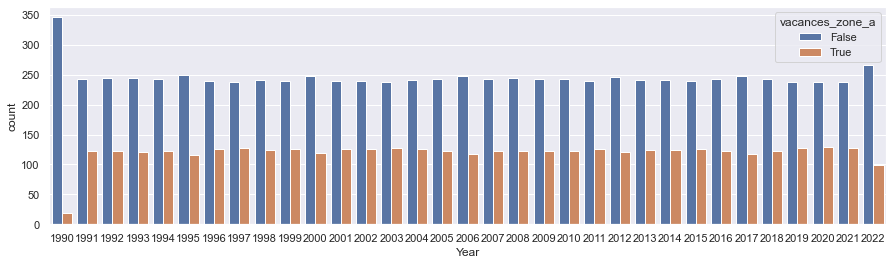

In [6]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,4))
ax = sns.countplot(x="Year", hue="vacances_zone_a", data=vacances_df)
ax.set(xticks = np.arange(0,vacances_df["Year"].nunique()))
plt.show()

In [7]:
vacances_2019 = vacances_df[vacances_df['Year'] == 2019].copy()
vacances_2020 = vacances_df[vacances_df['Year'] == 2020].copy()
vacances_2021 = vacances_df[vacances_df['Year'] == 2021].copy()
vacances_2019.head()

,date,vacances_zone_a,vacances_zone_b,vacances_zone_c,nom_vacances,Year,Month,Day
10592,2019-01-01,True,True,True,Vacances de Noël,2019,1,1
10593,2019-01-02,True,True,True,Vacances de Noël,2019,1,2
10594,2019-01-03,True,True,True,Vacances de Noël,2019,1,3
10595,2019-01-04,True,True,True,Vacances de Noël,2019,1,4
10596,2019-01-05,True,True,True,Vacances de Noël,2019,1,5


### Donnée métérologique

In [8]:
weather_df = pd.read_csv('/Users/ericblanvillain/code/EricBlanvillain/resto-655-project/resto-project-data/Data/Weather_Data/historical-data-paris.csv')
#pd.to_datetime(weather_df['dt_iso'])
weather_df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,feels_like,temp_min,temp_max,...,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1262304000,2010-01-01 00:00:00 +0000 UTC,3600,Champs Elysees,48.87079,2.3043,274.34,270.26,273.90,274.71,...,10,NaN,NaN,NaN,NaN,90,701,Mist,mist,50n
1,1262307600,2010-01-01 01:00:00 +0000 UTC,3600,Champs Elysees,48.87079,2.3043,274.09,269.95,273.48,274.45,...,10,NaN,NaN,NaN,NaN,90,701,Mist,mist,50n
2,1262311200,2010-01-01 02:00:00 +0000 UTC,3600,Champs Elysees,48.87079,2.3043,274.13,269.40,273.38,274.61,...,350,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n
3,1262314800,2010-01-01 03:00:00 +0000 UTC,3600,Champs Elysees,48.87079,2.3043,273.84,268.72,273.08,274.21,...,10,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n
4,1262318400,2010-01-01 04:00:00 +0000 UTC,3600,Champs Elysees,48.87079,2.3043,273.53,269.27,273.18,273.81,...,30,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n


In [16]:
vacations_df = pd.read_csv('/Users/ericblanvillain/code/EricBlanvillain/resto-655-project/resto-project-data/vacances_all_zones.csv')
vacations_df.head()

,date,vacances_zone_a,vacances_zone_b,vacances_zone_c,nom_vacances
0,1990-01-01,False,False,False,NaN
1,1990-01-02,False,False,False,NaN
2,1990-01-03,False,False,False,NaN
3,1990-01-04,False,False,False,NaN
4,1990-01-05,False,False,False,NaN


### Données restaurants

In [18]:
resto_df_DB = pd.read_excel('/Users/ericblanvillain/code/EricBlanvillain/resto-655-project/resto-project-data/Data/Data_Daroco/CA_DB_Janvier2019_2021.xlsx')
resto_df_DB.head()

,Année,Mois,Jour du mois,Tranche Horaire,Jour de la semaine,CA TTC,CA HT,TVA
0,2019,12,30,[22h à 23h[,Lundi,2607.5,2310.000000,297.500000
1,2019,12,3,[19h à 20h[,Mardi,2597.0,2292.803030,304.196970
2,2019,12,6,[21h à 22h[,Vendredi,1893.0,1654.924242,238.075758
3,2019,12,9,[22h à 23h[,Lundi,902.0,788.484848,113.515152
4,2019,12,11,[18h à 19h[,Mercredi,114.0,95.454545,18.545455


In [19]:
resto_df_DB["Tranche Horaire"].value_counts()

[19h à 20h[    673
[20h à 21h[    672
[13h à 14h[    661
[12h à 13h[    658
[21h à 22h[    655
[14h à 15h[    651
[22h à 23h[    631
[23h à 00h[    624
[00h à 01h[    575
[18h à 19h[    573
[15h à 16h[    566
[01h à 02h[    348
[16h à 17h[    271
[17h à 18h[    156
[11h à 12h[     98
[02h à 03h[     39
[10h à 11h[     23
[09h à 10h[      8
[03h à 04h[      1
Name: Tranche Horaire, dtype: int64

In [20]:
resto_df_DB['TH -1'] = np.where(resto_df_DB['Tranche Horaire']== '[00h à 01h[', True, False)
resto_df_DB

,Année,Mois,Jour du mois,Tranche Horaire,Jour de la semaine,CA TTC,CA HT,TVA,TH -1
0,2019,12,30,[22h à 23h[,Lundi,2607.5,2310.000000,297.500000,False
1,2019,12,3,[19h à 20h[,Mardi,2597.0,2292.803030,304.196970,False
2,2019,12,6,[21h à 22h[,Vendredi,1893.0,1654.924242,238.075758,False
3,2019,12,9,[22h à 23h[,Lundi,902.0,788.484848,113.515152,False
4,2019,12,11,[18h à 19h[,Mercredi,114.0,95.454545,18.545455,False
...,...,...,...,...,...,...,...,...,...
7878,2020,1,21,[19h à 20h[,Mardi,2521.0,2225.681818,295.318182,False
7879,2019,1,7,[18h à 19h[,Lundi,124.0,104.393939,19.606061,False
7880,2020,1,23,[15h à 16h[,Jeudi,28.0,25.454545,2.545455,False
7881,2019,1,9,[22h à 23h[,Mercredi,1516.0,1321.818182,194.181818,False


In [21]:
resto_df_DB["date"] = (resto_df_DB["Année"].astype(str)+"/"+resto_df_DB["Mois"].astype(str)+"/"+resto_df_DB["Jour du mois"].astype(str))
pd.to_datetime(resto_df_DB["date"])
resto_df_DB.head()

,Année,Mois,Jour du mois,Tranche Horaire,Jour de la semaine,CA TTC,CA HT,TVA,TH -1,date
0,2019,12,30,[22h à 23h[,Lundi,2607.5,2310.000000,297.500000,False,2019/12/30
1,2019,12,3,[19h à 20h[,Mardi,2597.0,2292.803030,304.196970,False,2019/12/3
2,2019,12,6,[21h à 22h[,Vendredi,1893.0,1654.924242,238.075758,False,2019/12/6
3,2019,12,9,[22h à 23h[,Lundi,902.0,788.484848,113.515152,False,2019/12/9
4,2019,12,11,[18h à 19h[,Mercredi,114.0,95.454545,18.545455,False,2019/12/11


In [22]:
resto_df_DB["date"].describe()

count           7883
unique           685
top       2019/12/26
freq              16
Name: date, dtype: object

In [23]:
resto_df_D16 = pd.read_excel('/Users/ericblanvillain/code/EricBlanvillain/resto-655-project/resto-project-data/Data/Data_Daroco/CA_DXVI_Aout2019_2021.xlsx')
resto_df_D16.head()

,Année,Mois,Jour du mois,Tranche Horaire,Jour de la semaine,CA TTC,CA HT,TVA
0,2019,12,3,[20h à 21h[,Mardi,1615.5,1434.696970,180.803030
1,2019,12,1,[22h à 23h[,Dimanche,423.5,377.575758,45.924242
2,2019,12,18,[16h à 17h[,Mercredi,12.0,10.909091,1.090909
3,2019,12,5,[23h à 00h[,Jeudi,128.0,113.333333,14.666667
4,2019,12,13,[12h à 13h[,Vendredi,1728.5,1554.318182,174.181818


In [ ]:
#resto_df_D16_2 = pd.read_csv('/Users/ericblanvillain/code/EricBlanvillain/resto-655-project/resto-project-data/Data/Data_Daroco/Nb_couverts_D16.csv')
#resto_df_D16_2.head()

In [ ]:
#resto_df_D16_2 = pd.read_excel('/Users/ericblanvillain/code/EricBlanvillain/resto-655-project/resto-project-data/Data/Data_Daroco/Nb_couverts_D16.xlsx')
#resto_df_D16_2.head()

In [ ]:
#resto_df_DB_2 = pd.read_excel('/Users/ericblanvillain/code/EricBlanvillain/resto-655-project/resto-project-data/Data/Data_Daroco/Nb_couverts_DB.xlsx')
#resto_df_DB_2.head()

### Financial data 

In [24]:
cac_40_raw = pd.read_csv('//Users/ericblanvillain/code/EricBlanvillain/resto-655-project/CAC_40/^FCHI.csv')
pd.to_datetime(cac_40_raw["Date"])
cac_40_raw["Year"] = pd.DatetimeIndex(cac_40_raw['Date']).year
cac_40_raw.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2019-01-02,4642.180176,4699.979980,4606.200195,4689.390137,4689.390137,76980400.0,2019
1,2019-01-03,4641.799805,4671.279785,4607.680176,4611.490234,4611.490234,78741500.0,2019
2,2019-01-04,4649.629883,4750.509766,4636.790039,4737.120117,4737.120117,95967400.0,2019
3,2019-01-07,4757.009766,4760.270020,4690.220215,4719.169922,4719.169922,73900700.0,2019
4,2019-01-08,4722.160156,4810.270020,4719.229980,4773.270020,4773.270020,98114900.0,2019


In [26]:
#sns.set_theme(style="darkgrid")
#plt.figure(figsize=(15,4))
#ax= sns.lineplot(data=cac_40_raw, x="Date", y="Close")
#ax.set(xticks = np.arange(0,cac_40_raw["Date"].nunique()))
#plt.show()

In [27]:
cac_40 = pd.read_csv('/Users/ericblanvillain/code/EricBlanvillain/resto-655-project/CAC_40/CAC40_stocks_2010_2021.csv')
cac_40.head()

,CompanyName,StockName,High,Low,Open,Close,Volume,Date
0,TechnipFMC,FTI,29.855000,29.075001,29.075001,29.615000,1908400.0,2010-01-04
1,TechnipFMC,FTI,30.270000,29.555000,29.610001,30.125000,2206600.0,2010-01-05
2,TechnipFMC,FTI,30.305000,29.434999,30.040001,30.264999,2724200.0,2010-01-06
3,TechnipFMC,FTI,30.219999,29.715000,30.155001,29.915001,2581000.0,2010-01-07
4,TechnipFMC,FTI,30.500000,29.625000,29.830000,30.450001,3280400.0,2010-01-08


In [28]:
cac_40["CompanyName"].unique()

array(['TechnipFMC', 'Atos', 'Publicis', 'Accor', 'Carrefour', 'Renault',
       'Veolia', 'Bouygues', 'Sodexo', 'ArcelorMittal', 'Capgemini',
       'Thales Group', 'Groupe PSA', 'Michelin', 'Legrand',
       'Unibail-Rodamco-Westfield', 'Saint-Gobain', 'STMicroelectronics',
       'Société Générale', 'Vivendi', 'Engie', 'Orange',
       'Crédit Agricole', 'Dassault Systèmes', 'Pernod Ricard', 'Danone',
       'Schneider Electric', 'Air Liquide', 'Vinci', 'Essilor', 'AXA',
       'Safran', 'BNP Paribas', 'Kering', 'Hermès', 'Airbus', 'Sanofi',
       'Total', 'L’Oréal', 'LVMH'], dtype=object)

In [29]:
cac_40_prepro = pd.read_csv('/Users/ericblanvillain/code/EricBlanvillain/resto-655-project/CAC_40/preprocessed_CAC40.csv')
cac_40_prepro.head()

,Unnamed: 0,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,0,Accor,2020-04-03,22.99,23.40,23.40,22.99,67
1,1,Accor,2020-04-02,23.91,22.99,23.91,22.99,250
2,2,Accor,2020-04-01,24.10,23.83,24.10,23.83,37
3,3,Accor,2020-03-31,25.04,25.00,25.24,24.99,336
4,4,Accor,2020-03-30,26.50,25.02,26.50,24.99,415


In [30]:
air_liquide = cac_40_prepro[cac_40_prepro['Name'] == 'Air Liquide'].copy()
air_liquide['Open'] = air_liquide['Open'].fillna(method='bfill')
air_liquide

,Unnamed: 0,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
2599,2599,Air Liquide,2020-04-02,116.00,112.95,116.00,110.00,331
2600,2600,Air Liquide,2020-04-01,115.95,114.05,115.95,112.30,480
2601,2601,Air Liquide,2020-03-31,113.90,114.60,115.35,112.95,784
2602,2602,Air Liquide,2020-03-30,110.25,112.15,112.70,106.90,485
2603,2603,Air Liquide,2020-03-27,110.20,107.00,110.20,105.80,525
...,...,...,...,...,...,...,...,...
5194,5194,Air Liquide,2010-01-08,51.28,51.52,51.52,51.28,64
5195,5195,Air Liquide,2010-01-07,50.82,51.34,51.34,50.82,48
5196,5196,Air Liquide,2010-01-06,51.49,51.34,51.49,51.34,257
5197,5197,Air Liquide,2010-01-05,52.09,51.86,52.09,51.76,"1,363"


In [31]:
air_liquide['Date'] = pd.to_datetime(air_liquide['Date'])
air_liquide['Year'] = air_liquide['Date'].dt.year
air_liquide['Month'] = air_liquide['Date'].dt.month

In [32]:
air_liquide.describe()

,Unnamed: 0,Open,Closing_Price,Daily_High,Daily_Low,Year,Month
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,3898.500000,80.769642,80.794277,81.203181,80.351423,2014.622308,6.381923
std,750.699674,18.004935,17.918281,18.048579,17.822264,2.966992,3.452183
min,2599.000000,47.350000,46.790000,47.660000,46.790000,2010.000000,1.000000
25%,3248.750000,66.165000,66.190000,66.517500,65.847500,2012.000000,3.000000
50%,3898.500000,77.650000,77.760000,78.065000,77.270000,2015.000000,6.000000
75%,4548.250000,94.640000,94.625000,95.042500,94.102500,2017.000000,9.000000
max,5198.000000,142.350000,141.350000,142.350000,140.000000,2020.000000,12.000000


/Users/ericblanvillain/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


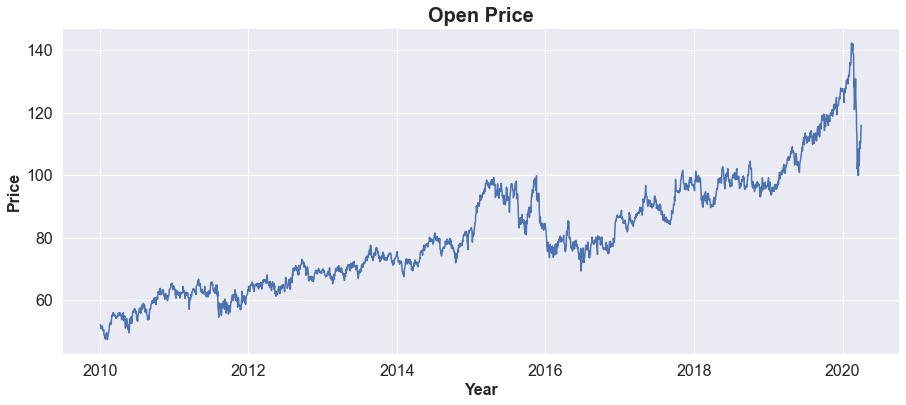

In [33]:
# Line plot
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(air_liquide['Date'], air_liquide['Open'] )

# Formatting
ax.set_title('Open Price', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.show();

### Toursim in Paris

In [41]:
hotels_occupency_rate = pd.read_excel('/Users/ericblanvillain/code/EricBlanvillain/resto-655-project/STATISTA/statistic_id1240962_monthly-occupancy-rate-in-hotels-in-paris-region-2020.xlsx', sheet_name='CSV')
hotels_occupency_rate

,Month,Year,Monthly occupancy rate in hotels in Paris region
0,January,2019,64.3
1,February,2019,66.8
2,March,2019,72.4
3,April,2019,79.3
4,Mai,2019,74.0
5,June,2019,88.0
6,July,2019,78.3
7,August,2019,67.8
8,September,2019,83.9
9,October,2019,81.5


In [42]:
hotels_occupency_rate.to_csv(path_or_buf='hotels_occupency_rate.csv', index= True)

# Analyse des données

In [ ]:
summary = pd.DataFrame()
summary["CA TTC"] = (resto_df_DB["CA TTC"])
summary = summary.describe().round(decimals=1).astype(object)
print(summary)
plt.plot(resto_df_DB["CA TTC"])
plt.show()

In [ ]:
sns.histplot(data = resto_df_DB, x =  )

In [ ]:
summary = pd.DataFrame()
summary["CA TTC"] = (resto_df_D16["CA TTC"])
summary = summary.describe().round(decimals=1).astype(object)
print(summary)
plt.plot(resto_df_D16["CA TTC"])
plt.show()